 <a id='ReturntoTop'></a>
<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>Oregon Wildlife - Image Classification Capstone</h1>
      <h3>Notebook 4 - Transfer Learning</h3>
      <p>Author: David Lappin | Company: BrainStation | Date: 3/1/2023 - 4/11/2023 </p>
    </div>
    <img src="randphotos/bannereagle.jpg" alt="your-image-description" style="height:150px; margin-left:20px; border: 4px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose



# Table of Contents

[Packages Import](#1)

[Data Import](#2)

[Prepare Data](#3)

[Create and Compile Baseline Model](#4)

[Fit and Run Model](#5)

[Preliminary Model Evaluation](#6)

[Import Test Data and Make Predictions](#7)

[Optional Loading of Saved Model](#8)

[Predict on New Data](#9)

[Summary and Next Steps](#10)

 # Packages Import:
 <a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**OS** - interaction with the native OS Python (used for establishing relative path to data files)

**PIL** - Python Imaging Library. Original support for python to deal with images

**glob** - Useful for finding pathname sbased on specific patterns

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

**visualkeras** - allows to visualize CNN model architechture

**Tensorflow** - Machine learning and artificial intelligence with particular focus on training and inference of deep neural networks

**Keras** - Application Program interface (API) built on tensorflow. Used for implementing neural networks (supports backend computation in tensor flow up to 2.3)

     

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import visualkeras


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Overview

# Import Data:

In [145]:
#set local path to files for basic exploration

trainpath = 'data/oregon_wildlife/' # This is the relative path to the data
valpath = 'data/oregon_wildlife_validation/' # This is the relative path to the data
testpath = 'data/oregon_wildlife_test/' # This is the relative path to the data

Ensure Data is still in the same state as we left it from the previous EDA before modeling.

In [3]:
#create counts of each class for the training set

totalcount_train = [] #empty list to store counts
class_for_count = [] #empty list to store class names


for file in image_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_train.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in train directory: {sum(totalcount_train)}')

588: bald_eagle
560: black_bear
535: bobcat
558: canada_lynx
580: columbian_black-tailed_deer
518: cougar
581: coyote
608: deer
505: elk
513: gray_fox
575: gray_wolf
420: mountain_beaver
536: nutria
569: raccoon
495: raven
602: red_fox
426: ringtail
540: seals
570: sea_lions
571: virginia_opossum
Total images: 10850


In [4]:
#create counts of each class for the validation set

totalcount_val = [] #empty list to store counts
class_for_count_val = [] #empty list to store class names

for file in image_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_validation/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_val.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in validation directory: {sum(totalcount_val)}')

135: bald_eagle
135: black_bear
135: bobcat
135: canada_lynx
135: columbian_black-tailed_deer
135: cougar
135: coyote
135: deer
135: elk
135: gray_fox
135: gray_wolf
135: mountain_beaver
135: nutria
135: raccoon
135: raven
135: red_fox
135: ringtail
135: seals
135: sea_lions
135: virginia_opossum
Total images: 2700


In [5]:
#create counts of each class for the test set

totalcount_test = [] #empty list to store counts
class_for_count_test = [] #empty list to store class names

for file in image_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_test/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_test.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in test directory: {sum(totalcount_test)}')

20: bald_eagle
20: black_bear
20: bobcat
20: canada_lynx
20: columbian_black-tailed_deer
20: cougar
20: coyote
20: deer
20: elk
20: gray_fox
20: gray_wolf
20: mountain_beaver
20: nutria
20: raccoon
20: raven
20: red_fox
20: ringtail
20: seals
20: sea_lions
20: virginia_opossum
Total images: 400


### Observations: 
Everything looks the same.

# Prepare Data:

In [146]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [147]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  trainpath,
  label_mode='int',
  seed=7,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)


val_set = tf.keras.preprocessing.image_dataset_from_directory(
  valpath,
  label_mode='int',
  seed=7,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 10850 files belonging to 20 classes.
Found 2700 files belonging to 20 classes.


**Note** These values match the counts from the directory above. 

# Create and Compile Updated Model

Similar to our preliminary compatibility testing in the EDA section we are going to create a simple Convolutional Neural Network (CNN) based in TF/Keras for our baseline model.

In [148]:
#adjust the prefetching for performance

AUTOTUNE = tf.data.AUTOTUNE #Autotune optimizes CPU uptime for each batch

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #cache stores data in memory after 1st epoch for faster iterations
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE) #prefetch allows for overlapping 


In [149]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')



In [150]:
base_model.trainable = False

In [151]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_22[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [152]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.1) 
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

dropout = tf.keras.layers.Dropout(0.2)

denselayer2 = tf.keras.layers.Dense(128, activation='relu', name='d1')
denselayer3 = tf.keras.layers.Dense(1280, activation='relu', name='d2')

prediction_layer = tf.keras.layers.Dense(20, activation='softmax', name='prediction')


In [153]:
inputs = tf.keras.Input(shape=(160, 160, 3))

x = data_augmentation(inputs)

x = preprocess_input(x)

x = base_model(x, training=False)

x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

#x = denselayer1(x)
#x = tf.keras.layers.Dropout(0.2)(x)
#x = denselayer2(x)
#x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)
mobV_model = tf.keras.Model(inputs, outputs)


In [154]:
base_learning_rate = 0.0001
mobV_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [155]:
mobV_model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_17 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_17 (TFOpLa  (None, 160, 160, 3)      0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                          

In [116]:
# set stopping criteria

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.05, patience=5)

In [156]:
epochs = 30

history = mobV_model.fit(   
  train_set,            
  validation_data=val_set, 
  epochs=epochs,
  callbacks = [callbacks]
)

Epoch 1/30
340/340 [==============================] - 130s 298ms/step - loss: 2.5932 - accuracy: 0.2438 - val_loss: 1.7039 - val_accuracy: 0.5370
Epoch 2/30
340/340 [==============================] - 96s 282ms/step - loss: 1.6378 - accuracy: 0.5178 - val_loss: 1.1604 - val_accuracy: 0.6781
Epoch 3/30
340/340 [==============================] - 94s 278ms/step - loss: 1.2962 - accuracy: 0.6154 - val_loss: 0.9568 - val_accuracy: 0.7189
Epoch 4/30
340/340 [==============================] - 95s 280ms/step - loss: 1.1470 - accuracy: 0.6513 - val_loss: 0.8513 - val_accuracy: 0.7500
Epoch 5/30
340/340 [==============================] - 96s 282ms/step - loss: 1.0485 - accuracy: 0.6773 - val_loss: 0.7868 - val_accuracy: 0.7678
Epoch 6/30
340/340 [==============================] - 94s 277ms/step - loss: 0.9751 - accuracy: 0.6980 - val_loss: 0.7437 - val_accuracy: 0.7800
Epoch 7/30
340/340 [==============================] - 94s 278ms/step - loss: 0.9274 - accuracy: 0.7117 - val_loss: 0.7128 - val_a

In [157]:
#save the model weights for use in predictions later if desired

mobV_model.save('models/MobileNetV2_2.h5')

# Preliminary Evaluation

We can visualize the model perfmormance.

##### SOURCE - plot code base from TF Guide:
https://www.tensorflow.org/tutorials/images/classification

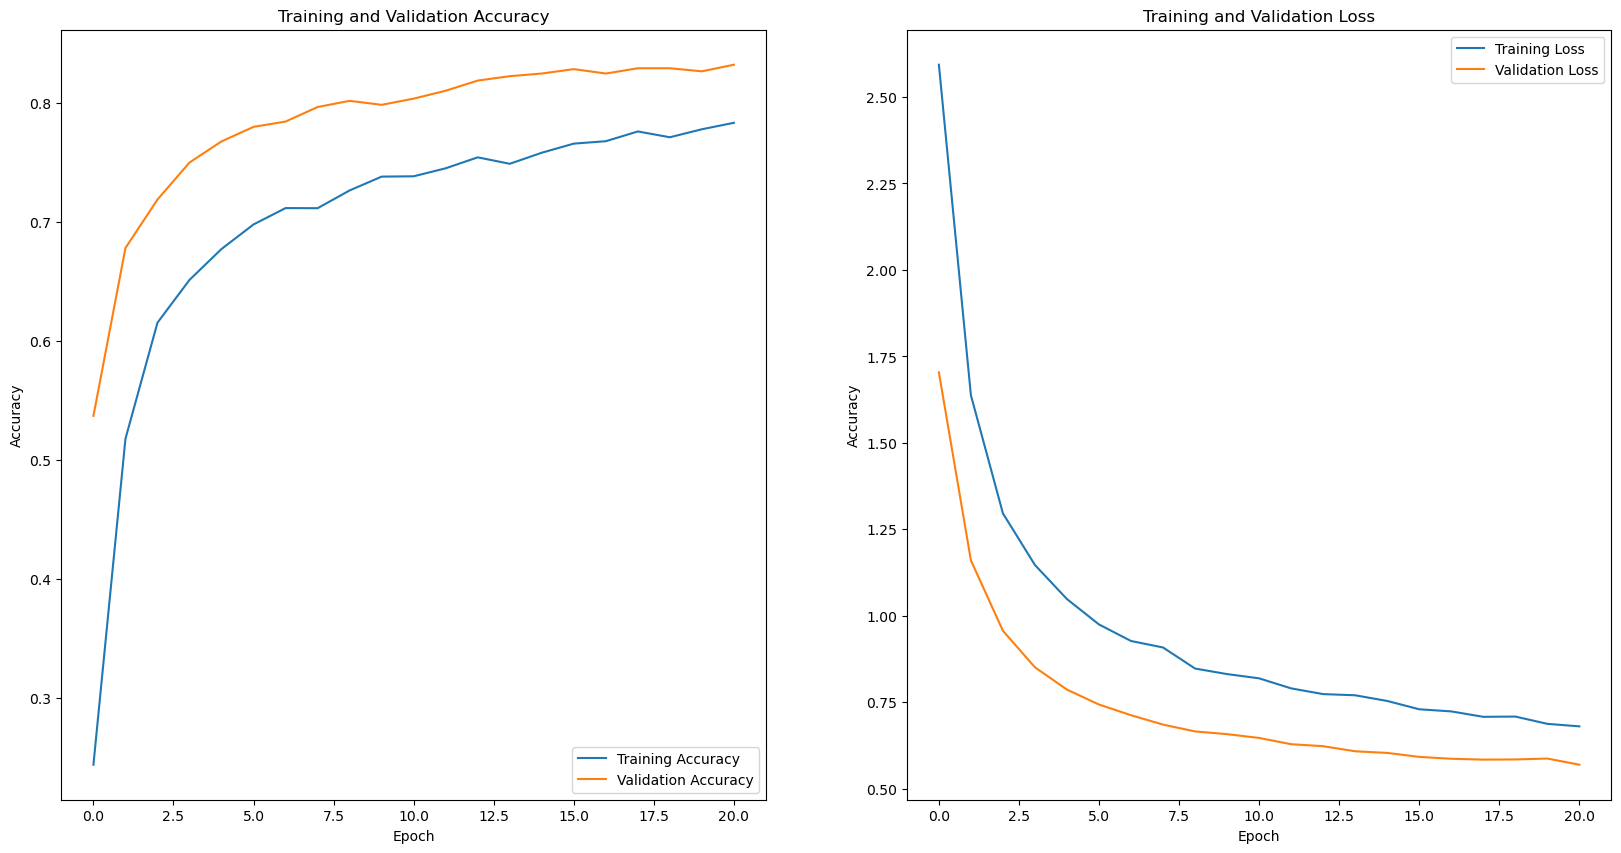

In [159]:
#visualize model performance after 30 

#pull out the accuracy and validation accuracies from model fit history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#pull out the loss data from the model fit history
loss = history.history['loss']
val_loss = history.history['val_loss']

#x lab range defined by the # of epochs ran
epochs_range = range(len(acc))

#training vs Validation Accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.axvline(31, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75)
#plt.axvline(41, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75)
#plt.axhline(0.39, color = "black", linestyle = '-', linewidth = 1, alpha = 0.75, label = 'Optimal Epochs (30)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#visualize loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations

# Import Test Data and Make Predictions

In [160]:
#import test set directory for predictions

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  testpath,
  image_size=IMG_SIZE,
  label_mode = 'categorical') #since these are not for training we can load as categorical rather than integer

Found 400 files belonging to 20 classes.


#### SOURCE

Found way to extract multiple predictions across whole dataset from answer by (Frightera, 2021)
https://stackoverflow.com/questions/68121629/trying-to-extract-y-val-from-dataset-throws-all-the-input-arrays-must-have-same

In [161]:
#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels


for x, y in test_set:
  
  #generate predictions 
  predictions = np.concatenate([predictions, np.argmax(mobV_model.predict(x), axis = -1)]) 

  #generate true labels
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 121ms/step


In [162]:
# generate a tensorflow confusion matrix from the predictions and true labels above

con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [163]:
#normalize the values such that they fit on a 0-1 scale
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

In [164]:
#define the class names and create temp dataframe to that we can plot using the class names (instead of integers)

class_names = test_set.class_names
con_mat_df = pd.DataFrame(normalized_conf_mat, index=class_names, columns=class_names)

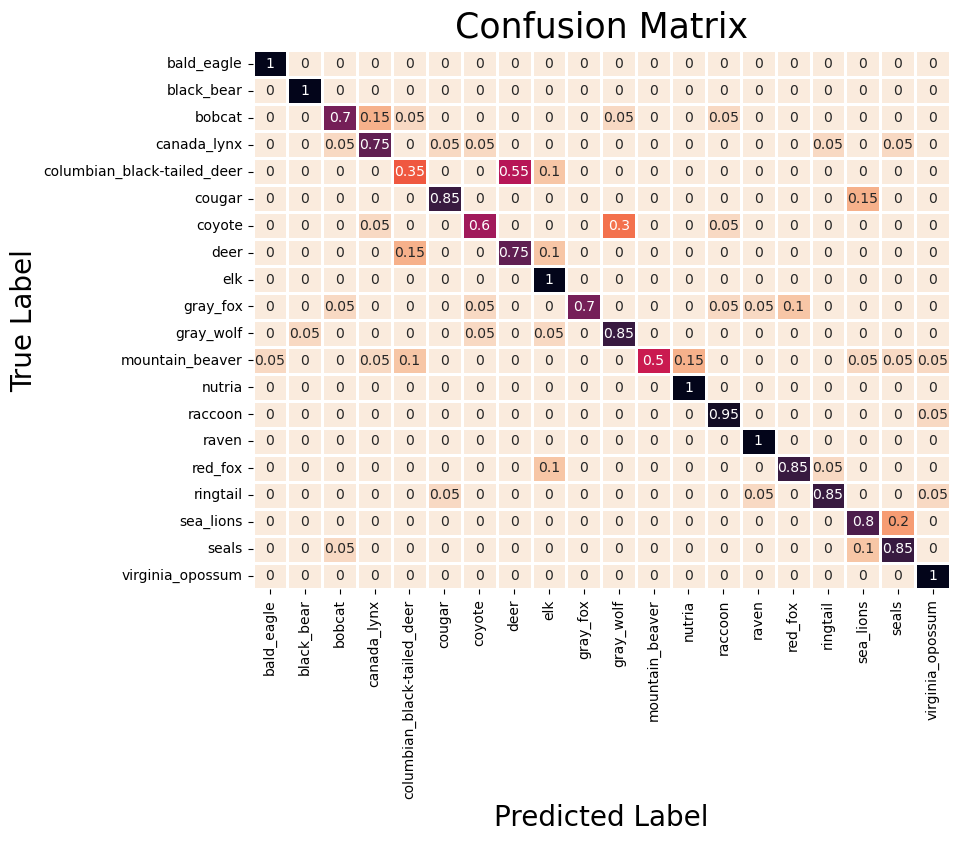

In [165]:
#plot confusion matrix using the data frame with class names created above
plt.figure(figsize = (9,7))
sns.heatmap(con_mat_df,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

### Observations

In [166]:
#generate classification report from predictions

target_names = test_set.class_names
print(classification_report(labels, predictions, target_names = target_names))

                             precision    recall  f1-score   support

                 bald_eagle       0.95      1.00      0.98        20
                 black_bear       0.95      1.00      0.98        20
                     bobcat       0.82      0.70      0.76        20
                canada_lynx       0.75      0.75      0.75        20
columbian_black-tailed_deer       0.54      0.35      0.42        20
                     cougar       0.89      0.85      0.87        20
                     coyote       0.80      0.60      0.69        20
                       deer       0.58      0.75      0.65        20
                        elk       0.74      1.00      0.85        20
                   gray_fox       1.00      0.70      0.82        20
                  gray_wolf       0.71      0.85      0.77        20
            mountain_beaver       1.00      0.50      0.67        20
                     nutria       0.87      1.00      0.93        20
                    raccoon      

To sort and look closer at the data we can translate the above information into a pandas dataframe so we can sort/agg/visualize the data easier if desired.

##### SOURCE - classification report to pandas df:

https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [167]:
#translate the classification report into pd df

classification_report_report = classification_report(labels, predictions, target_names = target_names, output_dict = True)
classification_report_df = pd.DataFrame(classification_report_report).transpose()
classification_report_df

,precision,recall,f1-score,support
bald_eagle,0.952381,1.0000,0.975610,20.0000
black_bear,0.952381,1.0000,0.975610,20.0000
bobcat,0.823529,0.7000,0.756757,20.0000
canada_lynx,0.750000,0.7500,0.750000,20.0000
columbian_black-tailed_deer,0.538462,0.3500,0.424242,20.0000
cougar,0.894737,0.8500,0.871795,20.0000
coyote,0.800000,0.6000,0.685714,20.0000
deer,0.576923,0.7500,0.652174,20.0000
elk,0.740741,1.0000,0.851064,20.0000
gray_fox,1.000000,0.7000,0.823529,20.0000


### Observations

In [168]:
#best f1 scores

classification_report_df.sort_values('f1-score', ascending = False).head(5)

,precision,recall,f1-score,support
bald_eagle,0.952381,1.0,0.975610,20.0
black_bear,0.952381,1.0,0.975610,20.0
raven,0.909091,1.0,0.952381,20.0
virginia_opossum,0.869565,1.0,0.930233,20.0
nutria,0.869565,1.0,0.930233,20.0


In [169]:
#worst f1 scores

classification_report_df.sort_values('f1-score', ascending = False).tail(5)

,precision,recall,f1-score,support
canada_lynx,0.750000,0.75,0.750000,20.0
coyote,0.800000,0.60,0.685714,20.0
mountain_beaver,1.000000,0.50,0.666667,20.0
deer,0.576923,0.75,0.652174,20.0
columbian_black-tailed_deer,0.538462,0.35,0.424242,20.0


### Observations

# Fine-Tuning the Model

In [172]:
base_model.trainable = True

In [173]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  154


In [174]:
# Fine-tune from this layer onwards (roughly 15% of the base model to finetune the top layers prior to the classification head)
fine_tune_at = 134

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False


In [175]:
base_learning_rate = 0.0001
mobV_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [176]:
mobV_model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_17 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_17 (TFOpLa  (None, 160, 160, 3)      0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                          

In [177]:
len(mobV_model.trainable_variables)

23

In [178]:
fine_tune_epochs = 10
prior_epochs = 21

total_epochs =  prior_epochs + fine_tune_epochs

history_fine = mobV_model.fit(train_set,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_set)


Epoch 21/31


C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


340/340 [==============================] - 114s 320ms/step - loss: 0.6522 - accuracy: 0.7884 - val_loss: 0.5515 - val_accuracy: 0.8356
Epoch 22/31
340/340 [==============================] - 105s 310ms/step - loss: 0.6335 - accuracy: 0.7924 - val_loss: 0.5508 - val_accuracy: 0.8359
Epoch 23/31
340/340 [==============================] - 106s 312ms/step - loss: 0.6085 - accuracy: 0.7971 - val_loss: 0.5338 - val_accuracy: 0.8430
Epoch 24/31
340/340 [==============================] - 105s 308ms/step - loss: 0.5748 - accuracy: 0.8109 - val_loss: 0.5218 - val_accuracy: 0.8500
Epoch 25/31
340/340 [==============================] - 109s 319ms/step - loss: 0.5691 - accuracy: 0.8143 - val_loss: 0.5255 - val_accuracy: 0.8404
Epoch 26/31
340/340 [==============================] - 106s 311ms/step - loss: 0.5297 - accuracy: 0.8233 - val_loss: 0.4976 - val_accuracy: 0.8530
Epoch 27/31
340/340 [==============================] - 109s 321ms/step - loss: 0.5089 - accuracy: 0.8316 - val_loss: 0.4975 - val_

In [179]:
#save the model weights for use in predictions later if desired

mobV_model.save('models/MobileNetV2_2finetuned.h5')

# Visualize

In [180]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


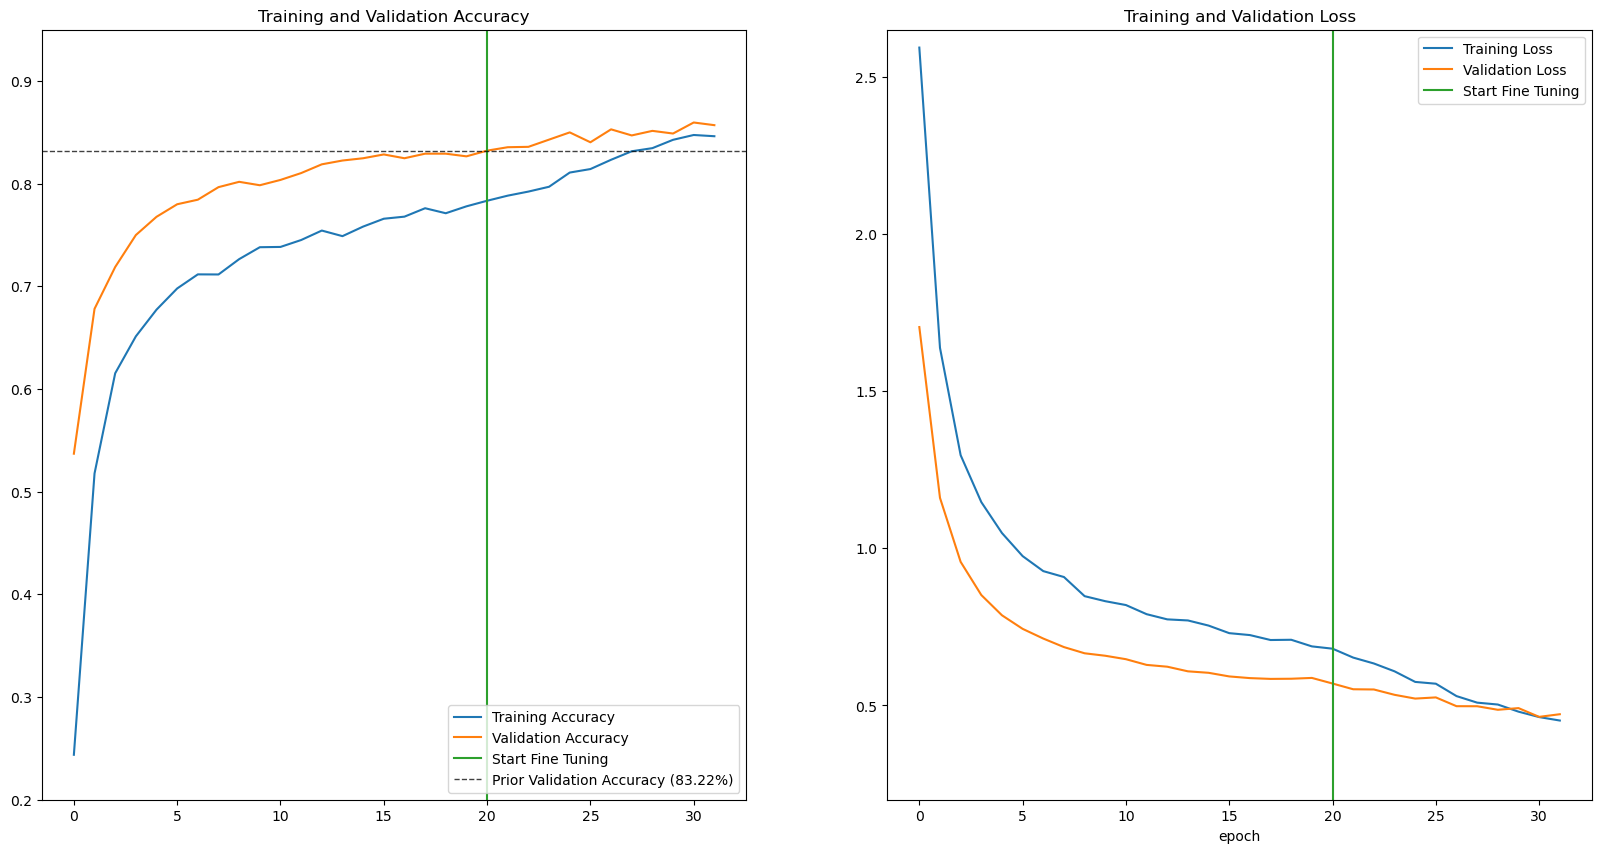

In [190]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.2, 0.95])
plt.plot([prior_epochs-1, prior_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.axhline(0.8322, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75, label = 'Prior Validation Accuracy (83.22%)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0.2, 2.65])
plt.plot([prior_epochs-1, prior_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


# Import Test Data and Make Predictions

In [191]:
#import test set directory for predictions

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  testpath,
  image_size=IMG_SIZE,
  label_mode = 'categorical') #since these are not for training we can load as categorical rather than integer

Found 400 files belonging to 20 classes.


#### SOURCE

Found way to extract multiple predictions across whole dataset from answer by (Frightera, 2021)
https://stackoverflow.com/questions/68121629/trying-to-extract-y-val-from-dataset-throws-all-the-input-arrays-must-have-same

In [192]:
#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels


for x, y in test_set:
  
  #generate predictions 
  predictions = np.concatenate([predictions, np.argmax(mobV_model.predict(x), axis = -1)]) 

  #generate true labels
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 1s 639ms/step


In [193]:
# generate a tensorflow confusion matrix from the predictions and true labels above

con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [194]:
#normalize the values such that they fit on a 0-1 scale
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

In [195]:
#define the class names and create temp dataframe to that we can plot using the class names (instead of integers)

class_names = test_set.class_names
con_mat_df = pd.DataFrame(normalized_conf_mat, index=class_names, columns=class_names)

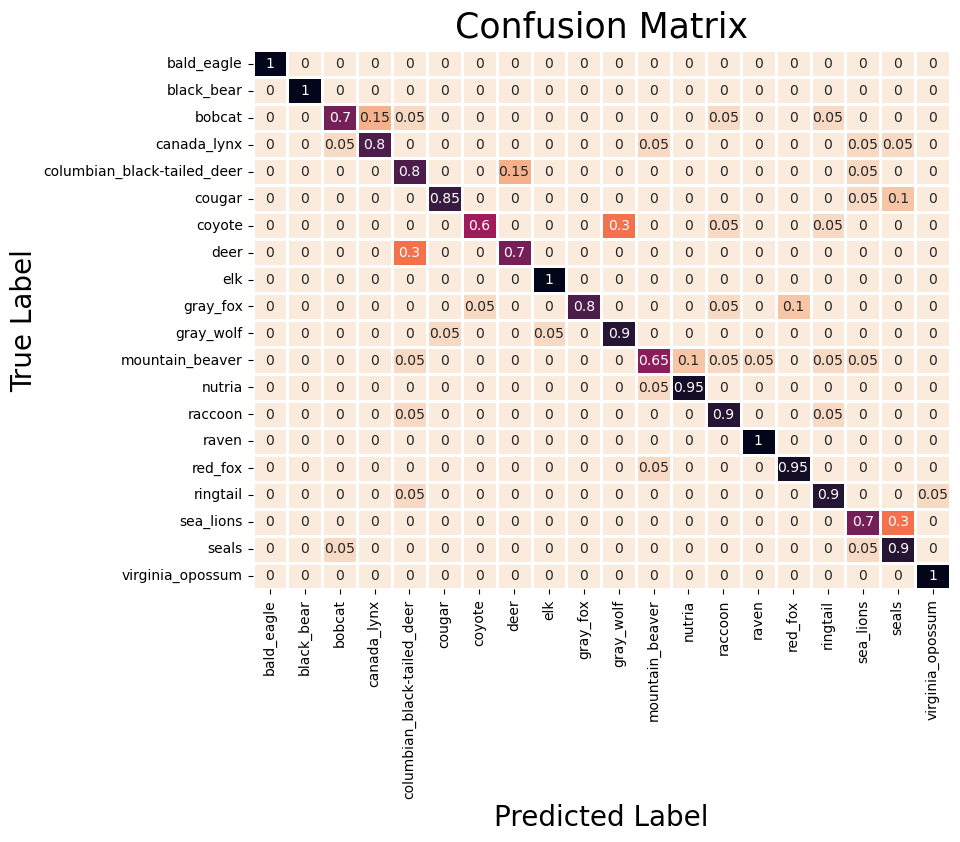

In [196]:
#plot confusion matrix using the data frame with class names created above
plt.figure(figsize = (9,7))
sns.heatmap(con_mat_df,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

### Observations

In [197]:
#generate classification report from predictions

target_names = test_set.class_names
print(classification_report(labels, predictions, target_names = target_names))

                             precision    recall  f1-score   support

                 bald_eagle       1.00      1.00      1.00        20
                 black_bear       1.00      1.00      1.00        20
                     bobcat       0.88      0.70      0.78        20
                canada_lynx       0.84      0.80      0.82        20
columbian_black-tailed_deer       0.62      0.80      0.70        20
                     cougar       0.94      0.85      0.89        20
                     coyote       0.92      0.60      0.73        20
                       deer       0.82      0.70      0.76        20
                        elk       0.95      1.00      0.98        20
                   gray_fox       1.00      0.80      0.89        20
                  gray_wolf       0.75      0.90      0.82        20
            mountain_beaver       0.81      0.65      0.72        20
                     nutria       0.90      0.95      0.93        20
                    raccoon      

To sort and look closer at the data we can translate the above information into a pandas dataframe so we can sort/agg/visualize the data easier if desired.

##### SOURCE - classification report to pandas df:

https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [198]:
#translate the classification report into pd df

classification_report_report = classification_report(labels, predictions, target_names = target_names, output_dict = True)
classification_report_df = pd.DataFrame(classification_report_report).transpose()
classification_report_df

,precision,recall,f1-score,support
bald_eagle,1.000000,1.000,1.000000,20.000
black_bear,1.000000,1.000,1.000000,20.000
bobcat,0.875000,0.700,0.777778,20.000
canada_lynx,0.842105,0.800,0.820513,20.000
columbian_black-tailed_deer,0.615385,0.800,0.695652,20.000
cougar,0.944444,0.850,0.894737,20.000
coyote,0.923077,0.600,0.727273,20.000
deer,0.823529,0.700,0.756757,20.000
elk,0.952381,1.000,0.975610,20.000
gray_fox,1.000000,0.800,0.888889,20.000


### Observations

In [199]:
#best f1 scores

classification_report_df.sort_values('f1-score', ascending = False).head(5)

,precision,recall,f1-score,support
bald_eagle,1.000000,1.0,1.00000,20.0
black_bear,1.000000,1.0,1.00000,20.0
virginia_opossum,0.952381,1.0,0.97561,20.0
elk,0.952381,1.0,0.97561,20.0
raven,0.952381,1.0,0.97561,20.0


In [200]:
#worst f1 scores

classification_report_df.sort_values('f1-score', ascending = False).tail(5)

,precision,recall,f1-score,support
deer,0.823529,0.70,0.756757,20.0
coyote,0.923077,0.60,0.727273,20.0
mountain_beaver,0.812500,0.65,0.722222,20.0
sea_lions,0.736842,0.70,0.717949,20.0
columbian_black-tailed_deer,0.615385,0.80,0.695652,20.0


# Optional Load for Future Model Predictions:

If desired in the future, the code below can be used as an example for loading the model to predict on new data or to continue training. The '.h5' file extension saves the model construction, the trained weights, and time information from `compile()`.

##### SOURCE
https://www.tensorflow.org/guide/keras/save_and_serialize

In [ ]:
#optional code to re-load and predict on new data

load_model = keras.models.load_model("models/MobileNetV2_2finetuned.h5") 


##### SOURCE - For predicting new data below - TF guide
https://www.tensorflow.org/tutorials/images/classification#predict_on_new_data

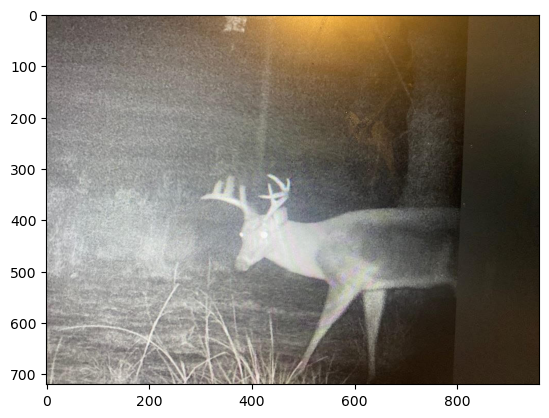

In [223]:
img_path = "randphotos/cardeer1.jpg"
img = image.load_img(img_path)
plt.imshow(img)
plt.show()

In [224]:
img = tf.keras.utils.load_img(
    img_path, target_size=(IMG_SIZE)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = mobV_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))


1/1 [==============================] - 0s 25ms/step
This image most likely belongs to deer with a 10.61 percent confidence.


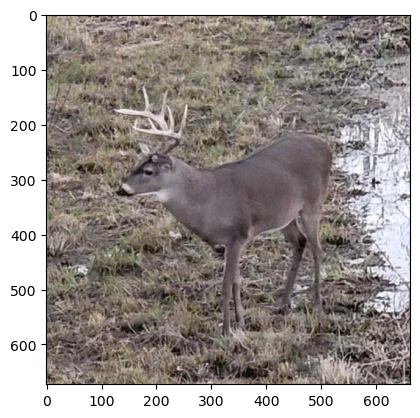

In [228]:
img_path = "randphotos/deer/daldeer1.jpg"
img = image.load_img(img_path)
plt.imshow(img)
plt.show()

In [229]:
img = tf.keras.utils.load_img(
    img_path, target_size=(IMG_SIZE)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = mobV_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))


1/1 [==============================] - 0s 48ms/step
This image most likely belongs to deer with a 8.90 percent confidence.


In [231]:
def predict_class(img_path, model):
    
    """
    This function will take in a defined image path as well as the name of the loaded model and then 
    it will show that image, predict on it, and print the prediction
    """
    
    # Define the image size expected by the model
    img_height, img_width = model.input_shape[1:3]

    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Show the image
    plt.imshow(img)
    plt.show()

    # Convert the image to an array and create a batch
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction on the image
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Get the predicted class label and confidence
    class_names = ['bald_eagle', 'black_bear', 'bobcat', 'canada_lynx', 'columbian_black-tailed_deer', 'cougar', 
                   'coyote', 'deer', 'elk', 'gray_fox', 'gray_wolf', 'mountain_beaver', 'nutria', 'raccoon', 'raven', 
                   'red_fox', 'ringtail', 'sea_lions', 'seals', 'virginia_opossum']

    pred_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Print the predicted class label and confidence
    print("This image most likely belongs to {} with a {:.2f}% confidence."
          .format(pred_class, confidence))

In [232]:
load_model = keras.models.load_model("models/MobileNetV2_2finetuned.h5") 

In [240]:
#Set some image paths 

eagle1 = "randphotos/eagle/mleagle1.jpg"
seal1 = "randphotos/seal/alseal1.JPEG"
deer1 = "randphotos/deer/daldeer1.jpg"
buff1 = 'randphotos/joke/buffalo.jpg'

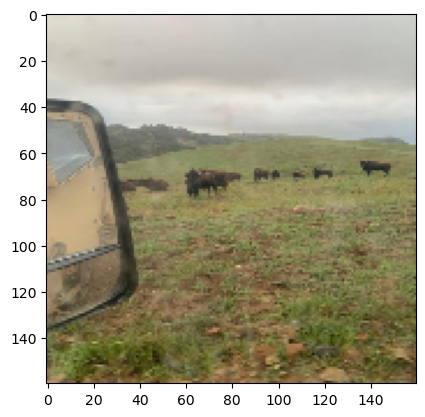

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to columbian_black-tailed_deer with a 7.07% confidence.


In [241]:
#use new function 

predict_class(buff1, load_model)

# Summary and Next Steps